# Week 2 Activity: Building Sinusoids, Practicing Functions, Understanding Digital Audio
Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

In [1]:
import numpy as np
from scipy.io.wavfile import read
from IPython.display import Audio
import matplotlib.pyplot as plt

## Sinusoids

1) Create (and then plot) a sinusoid of 44Hz, with amplitude of 2, and a sample rate of 22,050 that lasts 2 seconds.

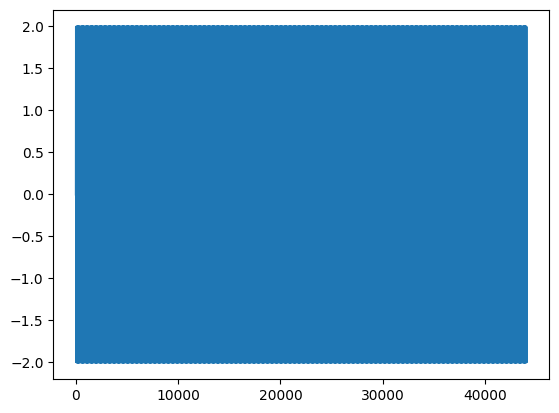

In [36]:
time = np.arange(0, 2, 1/22050)
sine = 2 * np.sin(2*np.pi * 440 * time)
plt.plot(sine)

2) Play back your sinusoid (SET VOLUME FIRST!)

In [37]:
Audio(sine, rate=22050)

3) Change the plot (don't just zoom in) such that you see only the first 10 cycles. Change the x-axis of your plot to show milliseconds.

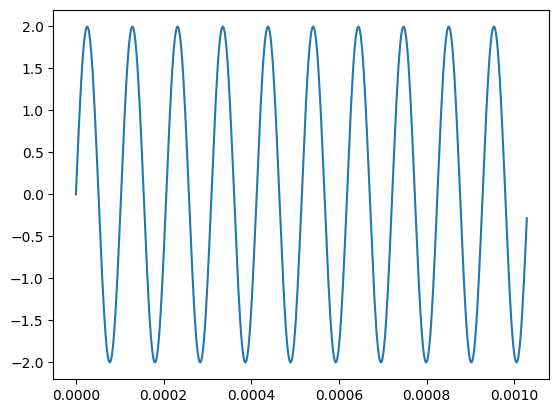

In [41]:
# crop to 10 cycles: 440 over 22050 * 2s = ((22050/440) * 10)
ind = int((22050/440) * 10)
sine_crop = sine[:ind]
# x axis to ms
time_crop = (time[:ind]/22050)*1000
plt.plot(time_crop,sine_crop)

4) Write a function called genSine() which returns a sinusoid and the time vector given frequency, phase offset, amplitude, sampling rate, and duration in seconds(remember you can use default parameters where appropriate)

In [2]:
def genSine(f=None, dur=1, A=1, phi=0, fs=44100):
    """
    Inputs:
    A (float) = amplitude of the sinusoid
    f (float) = frequency of the sinusoid in Hz
    phi (float) = initial phase of the sinusoid in radians
    fs (float) = sampling frequency of the sinusoid in Hz
    dur (float) = duration of the sinusoid (in seconds)
    Output:
    The function should return a numpy array
    x (numpy array) = The generated sinusoid (use np.cos())
    """
    import numpy as np
    A = float(A)
    f = float(f) 
    float(phi)
    fs = float(fs)
    dur = float(dur)
    
    t = np.arange(0,dur,1/fs)
    x = A * np.sin(2*np.pi*f*t + phi)
    return(x, t)

5. Plot 2 harmonic sinusoids with different amplitudes on top of each other using your function to generate the signals.

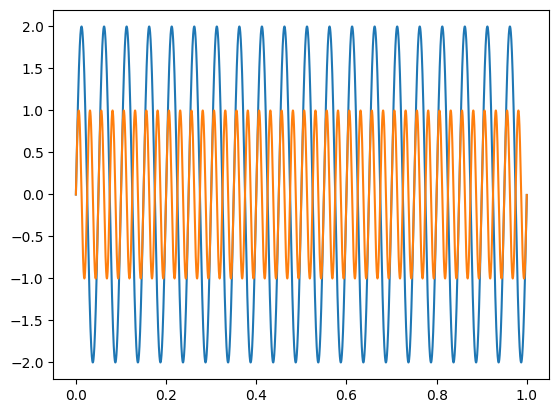

In [ ]:
sine1, t = genSine(20, A=2)
sine2, t = genSine(40, A=1)
plt.plot(t, sine1, t, sine2)

## Digital Audio - Sampling

1) Using your genSine function, create a sinusoid within a comfortable range in Hz of human hearing. It should cover 2s of duration and have a reasonable sampling rate. Play it back (with LOW volume!!)

In [3]:
fs = 22050
sine, t = genSine(200, dur=2, fs=fs)
Audio(sine, rate=fs)

2) What is the lowest sampling rate you can convert the sinusoid to and still hear the sound as a sinusoid at the appropriate pitch height? (Note: the `Audio` widget will not playback anything with a rate less than 3000 in Chrome and some other browsers - this can affect your mileage with this question!!)

The lowest sampling rate you can use is 2 * the frequency

3) Create a sinusoidal signal, $s$ with a fixed sampling rate of 10kHz.  Try to play back your sinusoid under differing conditions:

* change the frequency in Hz
* change the playback speed by altering the "rate" parameter in Audio

In doing this, try to examine for yourself the relation between the Nyquist frequency and aliasing. Make plots if it helps.

<StemContainer object of 3 artists>

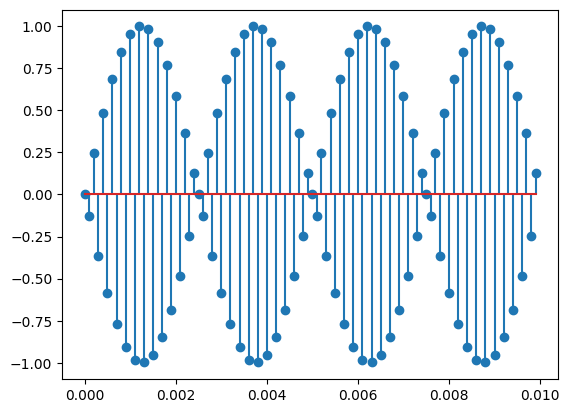

In [101]:
fs = 10000
# try frequencies at 5000, just under 5000, and above 5000, 4800
sine, t = genSine(5200, fs=fs)
Audio(sine, rate=fs)
plt.stem(t[:100], sine[:100])
#notice there is still aliasing in the range very close to Nyquist. This is due to sampling anti-alias filter issues. Though it is mathematically sound, it is not practical in the real world

4) Create two scenarios where you obtain an aliased frequency of approximately 200Hz (that you can (hypothetically) hear).

In [ ]:
fs = 10000
sine, t = genSine(10200, fs=fs)
Audio(sine, rate=fs)

In [12]:
fs = 4000
sine, t = genSine(3800, fs=fs)
Audio(sine, rate=fs)

5) Write a function to calculate aliased frequencies. Note: if sample rate is an even number, subtract 1 from sample rate first.

In [7]:
def alias(fs, freq):
    if fs % 2 == 0:
        fs -= 1
    return abs(freq - fs * round(freq/fs))

In [11]:
alias(4000, 3800)

199

## Digital Audio - Bit depth

1) Find the file "sax-phrase-short.wav" in the "audio" folder. What is the data type of the numeric values?

In [16]:
(fs, x) = read('../../audio/sax-phrase-short.wav')
type(x[0])

numpy.int16

2) Create a subset of the original signal from the 3000th to 4000th samples only. Plot it.

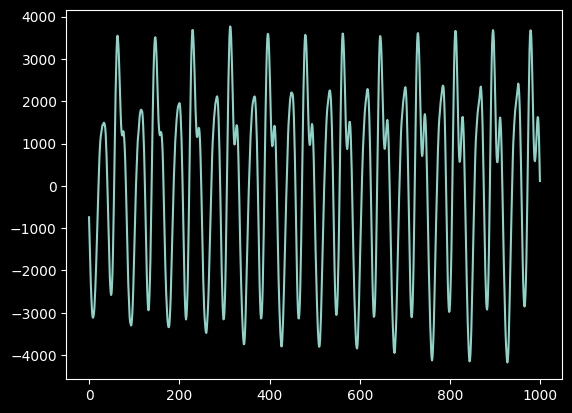

In [17]:
x = x[2999:3999]
plt.plot(x)

3) What is the bit depth of this audio clip?

*Hint: recall the data type*

16 bit

4) How could you convert the bit resolution to 8-bit?

*Hint: look at the range of values for numpy data types in the table from Lesson 5*

Convert to 8 bit int

5) Write a function to scale the audio to 8-bit Test it out and play it back.

In [19]:
def bitcrush(input_arr):
    return input_arr.astype(np.int8)

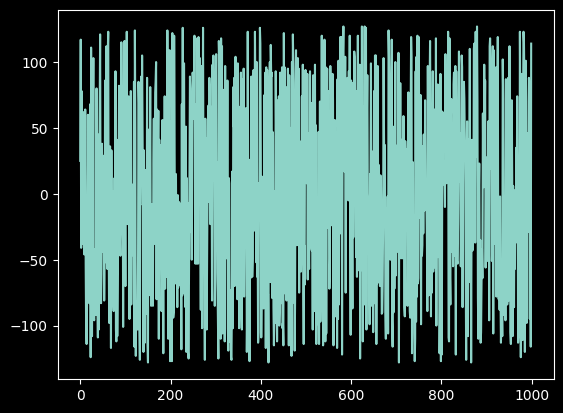

In [22]:
x = bitcrush(x)
plt.plot(x)

In [23]:
(fs, x) = read('../../audio/sax-phrase-short.wav')
x = bitcrush(x)
Audio(x, rate=fs)